# `clust-learn` - Module 3: Clustering 聚类

This guide shows how to use the `clustering` module of the `clust-learn` package to compute and explain clusters.

本指南展示了如何使用clust-learn包中的clustering模块来计算和解释聚类。

## 0. Setup

In [34]:
import numpy as np
import pandas as pd

from clearn.clustering import Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## 1. Data loading

DataFrame with extracted dimensions.

提取降维后的数据框。

In [35]:
df = pd.read_csv('data_TWN/data_台湾_modified_preprocessed_dim_red_output.csv')
print(df.shape)
df.head()

(1445, 23)


dim_01  dim_02  dim_03  dim_04  dim_05  dim_06  dim_07  dim_08  dim_09  \
0  1.3540  2.5128 -0.8932 -0.2838  0.4312 -1.6638  0.8274  0.9883  1.1531   
1 -1.7327 -0.1601  0.1794 -0.3726  0.4799 -1.7457  0.0794  0.7678  0.9473   
2 -0.1196 -0.9691 -0.7908 -0.4520  0.5543 -1.6204 -0.9290  0.6613  0.9989   
3  2.2205 -1.2992 -0.7240 -0.4115  0.4583 -1.6939 -1.5089  0.8867  1.0382   
4 -5.8403  1.0122 -2.0835 -0.4534  0.5621 -1.7547 -0.3782  0.5868  1.1028   

   dim_10  dim_11  dim_12  dim_13  dim_14  dim_15  dim_16  dim_17  dim_18  \
0 -0.4502  0.1000 -0.3582 -0.0898 -0.2074 -0.0258 -0.0973 -0.0720 -0.0466   
1  0.1471  0.1076 -0.3622 -0.1329 -0.1800 -0.0322 -0.0987 -0.0444 -0.0444   
2  0.6181  0.1004 -0.3670 -0.0984 -0.1816 -0.0274 -0.0867 -0.0268 -0.0741   
3 -0.0002  0.0954 -0.3841 -0.1301 -0.1401 -0.0146 -0.0846  0.0087 -0.0435   
4  0.8711  0.0943 -0.3923 -0.1431 -0.1433  0.0041 -0.0973 -0.0176 -0.0508   

   dim_19  dim_20  dim_21  dim_22  dim_23  
0  0.0342 -0.3323  0.1658 -0.1170  0.0700  
1  0.0466 -0.3068  0.0947 -0.0672  0.0905  
2  0.0226 -0.2832  0.0994 -0.0954  0.1023  
3 -0.0005 -0.2716  0.0825 -0.0863  0.1057  
4 -0.0063 -0.2935  0.0780 -0.0616  0.1065

DataFrame with original variables. This will later be used for results interpretation.

包含原始变量的数据框。这将在稍后用于结果解释。


In [36]:
df_original = pd.read_csv('data_TWN/data_台湾_modified_preprocess_ouput.csv')
print(df_original.shape)
df_original.head()

(1445, 274)


ASDAGE   ASRREA   ASRLIT   ASRINF   ASRIIE   ASRRSI  ASBGSEC  ASBGSSB  \
0 10.4200 606.7340 579.0375 601.9934 630.0420 612.7454  10.1209   8.6497   
1 10.4200 518.9040 506.7049 547.3156 516.5841 540.6112   8.5582  10.8211   
2 10.1700 548.3279 572.6483 582.0757 555.8815 563.4276   8.3421   8.6497   
3 10.0800 611.0975 624.6213 639.1869 604.0088 618.1115  10.3081   6.9364   
4 10.0000 408.2550 397.1210 430.8634 404.1142 407.1418   8.3421   7.8793   

   ASBGSB  ASBGERL  ASBGDRL  ASBGSLR  ASBGSCR  ASBGHRL  ASBHSES  ASBHELA  \
0  7.9032  10.6601   8.3144   7.8657   7.1986  11.2864  13.0493  10.2674   
1  8.9336  10.6601   9.8975   9.3851   7.8416  10.8926  10.7299   8.0567   
2 12.5675   8.0515   9.4226   8.4053   8.7269   9.6073   9.9917   7.6184   
3  9.0382   8.0515  10.2180   8.7748  13.4539   8.1824   7.2249   8.0567   
4 12.5675   7.2570   9.8975   5.3529   5.9520  10.2224  10.3472  10.7707   

   ASBHENA  ASBHELN  ASBHELT  ASBHPCS  ASBHPLR   ACBG09  ACBG15  ACBG16  \
0  13.2059  11.4773  12.1290  10.8395   9.8488 152.0000  9.0000  5.0000   
1  12.2504   9.8827   8.7284   7.3506   7.4098 152.0000  9.0000  5.0000   
2   9.6243   8.5751   9.4223  10.1060   7.8339 152.0000  9.0000  5.0000   
3   9.2144   8.5751   9.0796   7.3506   9.3457 152.0000  9.0000  5.0000   
4  10.0490  10.3576  10.8019   8.4650   8.6708 152.0000  9.0000  5.0000   

   ACBGRRS  ACBGEAS  ACBGDAS  ACDGTIHY  ATBG01  ATBR01A  ATBR01B  ATBR02A  \
0   8.9985   9.7244  12.9615  773.3333 30.0000  25.0000  25.0000   3.0000   
1   8.9985   9.7244  12.9615  773.3333 30.0000  25.0000  25.0000   3.0000   
2   8.9985   9.7244  12.9615  773.3333 30.0000  25.0000  25.0000   3.0000   
3   8.9985   9.7244  12.9615  773.3333 30.0000  25.0000  25.0000   3.0000   
4   8.9985   9.7244  12.9615  773.3333 30.0000  25.0000  25.0000   3.0000   

   ATBR02B  ATBGEAS  ATBGSOS  ATBGTJS  ATBGSLI  ATDGLIHY  ATDGRIHY  ITSEX  \
0   5.0000   8.2402   7.5266   3.8400   9.1022  233.3333  166.6667      2   
1   5.0000   8.2402   7.5266   3.8400   9.1022  233.3333  166.6667      2   
2   5.0000   8.2402   7.5266   3.8400   9.1022  233.3333  166.6667      2   
3   5.0000   8.2402   7.5266   3.8400   9.1022  233.3333  166.6667      2   
4   5.0000   8.2402   7.5266   3.8400   9.1022  233.3333  166.6667      2   

   ASRIBM  ASBG03  ASBG05A  ASBG05B  ASBG05E  ASBG05F  ASBG05G  ASBG05H  \
0       4       1        1        1        2        1        2        1   
1       3       3        1        1        2        1        2        2   
2       3       1        1        2        2        2        2        2   
3       4       3        2        2        2        1        1        2   
4       2       1        2        1        2        1        1        2   

   ASBG05I  ASBG06  ASBG07A  ASBG07B  ASBG08A  ASBG08B  ASBG10F  ASBR03A  \
0        1       5        2        3        1        1        1        3   
1        1       1        2        4        1        1        1        4   
2        1       5        3        3        2        3        1        2   
3        2       5        1        3        1        1        1        2   
4        1       5        4        4        1        1        4        4   

   ASBR03B  ASBR03C  ASBR04  ASBR05  ASDGSEC  ASDGSSB  ASDGSB  ASDGERL  \
0        3        2       3       1        2        2       2        1   
1        2        2       4       1        2        1       2        1   
2        2        2       1       2        3        2       1        2   
3        2        4       1       4        2        3       2        2   
4        4        4       4       1        3        2       1        2   

   ASDGDRL  ASDGSLR  ASDGSCR  ASDG05S  ASBH02A  ASBH02B  ASBH03A  ASBH03B  \
0        2        3        3        3        1        1        1        1   
1        2        2        3        2        1        1        1        1   
2        2        2        2        2        1        1        1        1   
3        2        2        1        3        1     

We separate numerical and categorical variables from the original set of variables.

我们从原始变量集中分离数值变量和分类变量。


In [37]:
num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH03F', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH18BA', 'ASBH18BB', 'ASBH18CA', 'ASBH18CB', 'ASBH18DA', 'ASBH18DB', 'ASBH18EA', 'ASBH18EB', 'ASBH18FA', 'ASBH18FB', 'ASBH19', 'ASBH20A', 'ASBH20B', 'ASBH20C', 'ASBH21A', 'ASBH21B', 'ASBH21C', 'ASBH21D', 'ASBH22', 'ASDGHRL', 'ASDHSES', 'ASDHELA', 'ASDHENA', 'ASDHELN', 'ASDHELT', 'ASDHPCS', 'ASDHPLR', 'ASDHAPS', 'ASDHEDUP', 'ASDHOCCP', 'ACBG04', 'ACBG05A', 'ACBG05B', 'ACBG07A', 'ACBG07B', 'ACBG07C', 'ACBG08', 'ACBG13', 'ACBG14C', 'ACBG14D', 'ACBG14E', 'ACBG14F', 'ACBG14G', 'ACBG14H', 'ACBG14I', 'ACBG14J', 'ACBG14K', 'ACBG14L', 'ACBG14M', 'ACBG14N', 'ACBG17', 'ACBG18A', 'ACBG18B', 'ACBG18C', 'ACBG19', 'ACBG20', 'ACBG21A', 'ACBG21B', 'ACBG21C', 'ACBG21D', 'ACBG21E', 'ACBG21F', 'ACDGRRS', 'ACDGEAS', 'ACDGDAS', 'ACDGSBC', 'ATBG02', 'ATBG03', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

We make a selection of the original variables for some visualizations.
我们选择了一些原始变量来进行可视化。


In [38]:
num_vars_sel=num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 
                         'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 
                         'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 
                         'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 
                         'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 
                         'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']

## 1. Clustering computation 聚类计算


We compare k-means, agglomerative clustering with Ward's linkage, and Gaussian Mixture models. We don't normalize the data (`normalize=False`) because we're using the components extracted from the dimensionality reduction process.

我们比较了k-means、具有Ward链接的凝聚聚类以及高斯混合模型。我们没有对数据进行标准化（`normalize=False`），因为我们使用的是从降维过程中提取的成分。


In [39]:
km = KMeans(random_state=42)
ward = AgglomerativeClustering()
gmm = GaussianMixture()

In [40]:
# 创建三种聚类算法实例，并通过Clustering类封装数据。
# K均值适合球形簇，层次聚类适合层级结构，高斯混合模型适合复杂分布。
cl = Clustering(df, algorithms= [km, ward, gmm], normalize=False)

In [41]:
cl.df.describe()

dim_01    dim_02    dim_03    dim_04    dim_05    dim_06    dim_07  \
count 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000   
mean     0.0000   -0.0000   -0.0000    0.0000    0.0000   -0.0000   -0.0000   
std      2.2102    1.7203    1.5441    1.5035    1.4915    1.4701    1.4677   
min     -9.2927   -6.4458   -6.5706   -5.7876   -2.5336   -3.0221   -4.5965   
25%     -1.3918   -1.0969   -1.0084   -0.6089   -1.0330   -1.2268   -0.9801   
50%      0.2858   -0.1452   -0.1127    0.2890   -0.1488    0.1040   -0.0527   
75%      1.5705    1.0122    0.9538    0.9824    0.6194    0.9599    0.8699   
max      5.5013    6.4107    4.5379    2.6439    7.3189    4.0260    4.3214   

         dim_08    dim_09    dim_10    dim_11    dim_12    dim_13    dim_14  \
count 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000   
mean     0.0000   -0.0000   -0.0000   -0.0000   -0.0000    0.0000    0.0000   
std      1.2879    1.2471    1.2343    0.3007    0.2502    0.2430    0.2379   
min     -3.3881   -2.5233   -3.7486   -0.7117   -0.6122   -0.4798   -0.6682   
25%     -0.9733   -0.8901   -0.8553   -0.1921   -0.1473   -0.1927   -0.1464   
50%      0.0000   -0.3828    0.0446    0.0195   -0.0190   -0.0095    0.0055   
75%      0.9341    0.9396    0.8802    0.2426    0.1497    0.1340    0.1370   
max      3.6172    3.7909    3.7174    0.8095    0.8100    0.7067    0.8185   

         dim_15    dim_16    dim_17    dim_18    dim_19    dim_20    dim_21  \
count 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000 1445.0000   
mean     0.0000    0.0000   -0.0000    0.0000   -0.0000   -0.0000   -0.0000   
std      0.2238    0.2128    0.2100    0.2078    0.2011    0.2006    0.1939   
min     -0.5089   -0.4471   -0.5005   -0.4709   -0.5627   -0.4040   -0.4875   
25%     -0.1487   -0.1189   -0.1074   -0.1322   -0.1373   -0.1447   -0.1136   
50%     -0.0258   -0.0095   -0.0056   -0.0109   -0.0370   -0.0003   -0.0268   
75%      0.1196    0.0916    0.1232    0.1195    0.1135    0.1353    0.1385   
max      0.5719    0.6969    0.8305    0.5985    0.5914    0.6023    0.5043   

         dim_22    dim_23  
count 1445.0000 1445.0000  
mean    -0.0000    0.0000  
std      0.1893    0.1849  
min     -0.5315   -0.5343  
25%     -0.1105   -0.1151  
50%     -0.0263    0.0099  
75%      0.1110    0.1049  
max      0.7346    0.5727

The code below computes the optimal number of clusters between 2 and 21 and adds the prefict `'STU'` (from the word student) to the cluster labels.

以下代码计算了在2到21之间的最优聚类数，并在聚类标签前添加了前缀'STU'（来自单词“teacher”）。

As performance metric teh default one is used (WSS or inertia - `metric='inertia'`).

作为性能指标，默认使用了WSS或惯性（metric='inertia'）。

In [42]:
# 在2到21个聚类范围内寻找最优聚类数，并为聚类标签添加前缀STU。
# 返回每个样本的聚类标签。
cl.compute_clusters(max_clusters = 21, prefix='STU')

array([0, 5, 3, ..., 2, 4, 4], dtype=int32)

In [43]:
# 在调用 plot_score_comparison 前转换标签类型
cl.df['cluster'] = cl.df['cluster'].astype(int)


In [44]:
# 存储三个聚类模型的评分或评估指标。
cl.scores_

{'KMeans(random_state=42)': [np.float64(35242.25668764734),
  np.float64(29821.362065898888),
  np.float64(27876.818480303336),
  np.float64(26385.614648827148),
  np.float64(24965.728745716693),
  np.float64(24015.321117618405),
  np.float64(23064.13791302298),
  np.float64(22288.996477103043),
  np.float64(21881.48694632896),
  np.float64(21292.526172521848),
  np.float64(20304.61202595623),
  np.float64(19533.64804898514),
  np.float64(19135.150384585322),
  np.float64(18808.551113281785),
  np.float64(18200.813278056583),
  np.float64(18046.76240050345),
  np.float64(17689.322047386846),
  np.float64(17415.575855283987),
  np.float64(17135.924111168915),
  np.float64(17156.92521753085),
  np.float64(16577.91254538429)],
 'AgglomerativeClustering()': [np.float64(35242.25668764734),
  np.float64(31926.23275510531),
  np.float64(30008.573012378376),
  np.float64(28228.608797445686),
  np.float64(26613.227208070788),
  np.float64(25414.49516342195),
  np.float64(24709.45123492911),
  n

In [45]:
# 存储聚类模型对数据点的聚类标签（cluster labels）。这些标签表示每个数据点被分配到的聚类编号。
cl.labels_

array([0, 5, 3, ..., 2, 4, 4], dtype=int32)

In [46]:
# 存储聚类模型的评估指标或度量方法。这些指标或方法用于衡量聚类结果的质量或描述聚类的特性。
# Inertia 表示所有数据点到其所属聚类中心的欧几里得距离的平方和
cl.metric_

'inertia'

In [47]:
# 最优配置（算法、聚类数、评分）
print("最优配置（算法、聚类数、评分）\n", cl.optimal_config_)

最优配置（算法、聚类数、评分）
 ('KMeans(random_state=42)', np.int64(7), np.float64(23064.13791302298))


## 2. Cluster performance 聚类性能可视化


The code below generates a bar plot with the number of observations per cluster.

以下代码生成了一个条形图，显示了每个聚类中的观测值数量。

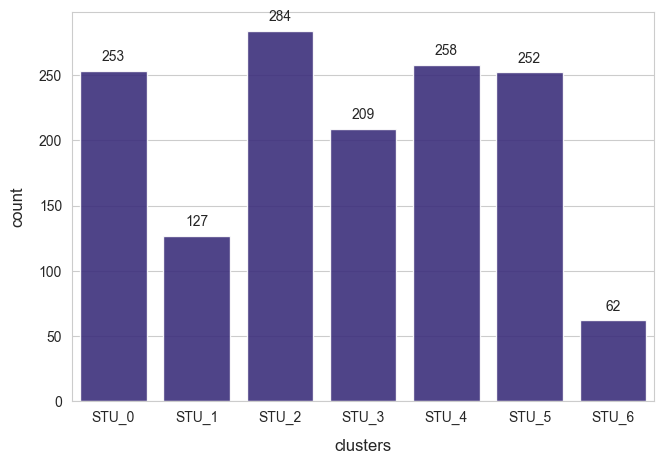

In [48]:
# 绘制每个聚类的样本数量的条形图。
cl.plot_clustercount() #output_path='PATH.jpg')


# # 绘制每个聚类的观测数  # 聚类结果可视化
# # Plot number of observations per cluster
# cl.plot_clustercount(output_path=os.path.join("img_MAC", "聚类数量分布图cluster_count.jpg"))
# print("已完成聚类数量分布图的生成。")

The code below generates a plot with the performance comparison between kmeans and aggomerative clustering.

以下代码生成了一个比较k-means聚类和凝聚聚类性能的图表。

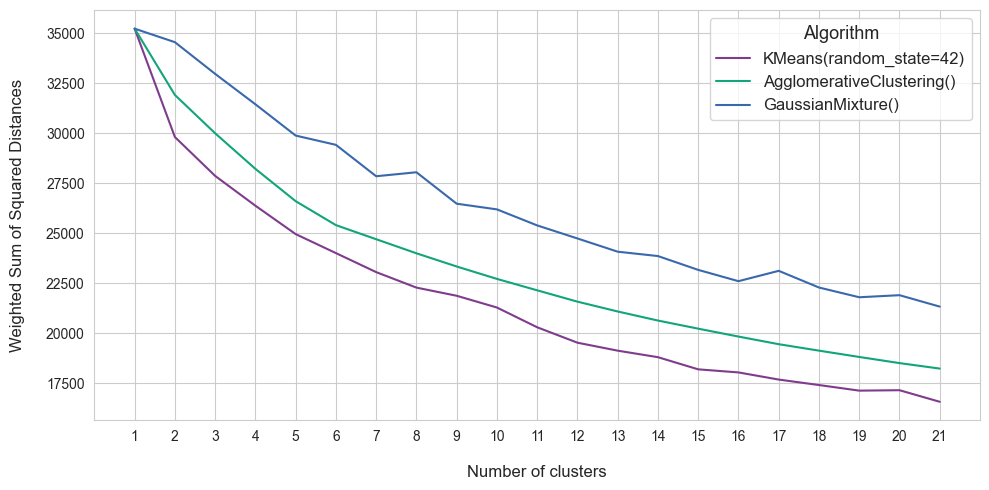

In [49]:
# # 横轴（Number of clusters）：表示聚类的数量，从 1 到 21。
# # 纵轴（Weighted Sum of Squared Distances）：表示加权平方距离（Weighted Sum of Squared Distances），值越小表示聚类效果越好
# cl.plot_score_comparison(output_path=os.path.join("img_MAC", "聚类算法性能的图表performance_comparison.jpg"))
# print("已完成聚类算法性能的图表的生成。")

cl.plot_score_comparison()

# 横轴（Number of clusters）：表示聚类的数量，从 1 到 21。
# 纵轴（Weighted Sum of Squared Distances）：表示加权平方距离（Weighted Sum of Squared Distances），值越小表示聚类效果越好

The code below plots the normalized WSS and difference curve used by the elbow method.

以下代码绘制了用于肘部法则的标准化WSS（总平方和）和差分曲线。

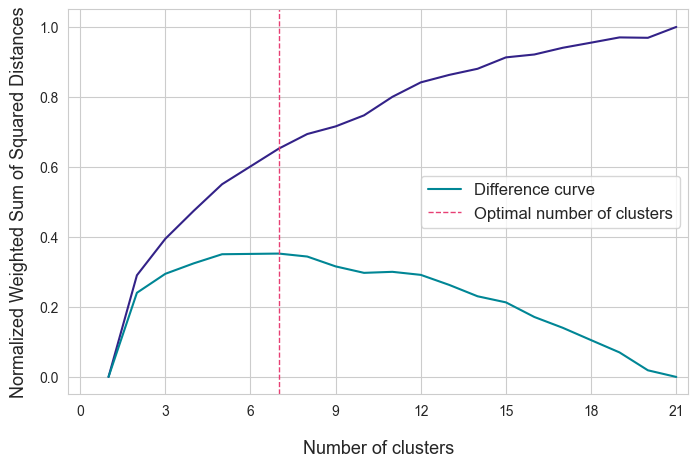

In [50]:
# 绘制肘部法则的标准化 WSS 和差分曲线。
cl.plot_optimal_components_normalized() #output_path='PATH.jpg')


# # 绘制肘部法则用于选择最优 k 的标准化 WSS 曲线  # 最优聚类数选择曲线
# # Plot normalized WSS curve for optimal k selection
# cl.plot_optimal_components_normalized(output_path=os.path.join("img_MAC", "最优聚类数选择曲线clustering_elbow_curve.jpg"))
# print("已完成最优聚类数选择曲线的生成。")

## 3. Analysis of clusters 聚类分析

### 3.1. Descriptive statistics by cluster 按聚类的描述性统计

#### 3.1.1. Internal variables 内部变量:降维之后的

'Mean', 'Std', 'Median', 'Mode'  

均值、标准差、中位数和众数

In [51]:
# Internal variables 内部变量
# 查看指定内部变量（如 dim_01 和 dim_07）的均值。
cl.describe_clusters(variables=['dim_01', 'dim_07'], statistics='mean')

cluster  dim_01  dim_07
             mean    mean
0       0  1.1496  1.0817
1       1 -0.1631 -0.7529
2       2 -0.4010 -0.9712
3       3  1.0386  0.1200
4       4  1.8340  1.0618
5       5 -3.2705 -0.7775
6       6 -0.3602 -0.0860

In [52]:
# 查看全部内部变量描述性统计
cl.describe_clusters()

cluster  dim_01                 dim_02                 dim_03          \
             mean  median    std    mean  median    std    mean  median   
0       0  1.1496  1.2572 1.5323  2.3477  2.1176 1.3084  0.5728  0.5115   
1       1 -0.1631 -0.3520 1.7705 -0.3154 -0.4702 1.5499  0.0177  0.1105   
2       2 -0.4010 -0.4805 1.1596 -0.9448 -0.8576 1.3694  0.5758  0.4838   
3       3  1.0386  0.9390 1.3829 -0.2136 -0.1610 1.2978  0.1267 -0.0818   
4       4  1.8340  1.8720 1.2144 -0.3939 -0.2717 1.1660 -0.6166 -0.6087   
5       5 -3.2705 -2.9242 1.5435 -0.4747 -0.4809 1.3488 -0.7588 -0.7515   
6       6 -0.3602 -0.1243 1.4708 -0.3179 -0.3242 1.1382  0.2120  0.1899   

          dim_04                 dim_05                 dim_06                 \
     std    mean  median    std    mean  median    std    mean  median    std   
0 1.4762  0.3215  0.3313 1.0612 -0.0638  0.0101 1.0845  0.1489  0.3459 1.3617   
1 1.6123 -3.4168 -3.4814 1.1170 -0.4938 -0.7614 0.8039  0.0645 -0.5563 1.9452   
2 1.4664  0.5018  0.5684 0.9415 -0.5774 -0.4140 1.0045  0.4549  0.5239 1.1776   
3 1.4281 -0.0487 -0.1086 0.8412  0.2612  0.2852 1.0205 -0.8527 -1.3222 1.2318   
4 1.2282  0.4199  0.6106 0.9398 -0.4024 -0.3911 1.0483  0.4430  0.5280 1.2802   
5 1.5674 -0.0080  0.2449 1.1792  0.0275  0.0349 0.9282 -0.4943 -0.6592 1.4968   
6 1.2958  1.8378  1.6158 0.4655  4.5990  2.6571 2.3590  0.2166  1.0279 1.5856   

   dim_07                 dim_08                 dim_09                 \
     mean  median    std    mean  median    std    mean  median    std   
0  1.0817  0.9086 1.2360 -0.3846 -0.3487 1.2639 -0.1078 -0.3540 1.0418   
1 -0.7529 -0.6859 1.2031 -0.1412 -0.0521 1.0190 -0.2947 -0.4236 0.6311   
2 -0.9712 -0.8527 1.0855 -0.0966 -0.1686 1.2868 -0.3370 -0.5293 0.8852   
3  0.1200  0.1342 1.2144  0.1774  0.4068 1.3679  1.7683  1.5889 0.9588   
4  1.0618  0.9021 1.1794  0.1635  0.1649 1.2405 -0.7389 -0.8097 0.7442   
5 -0.7775 -0.7463 1.1894  0.1398  0.0881 1.0645 -0.0143 -0.3501 1.3528   
6 -0.0860 -0.0738 1.3288  0.4544  0.4321 2.0254 -0.2406 -0.7502 1.0177   

   dim_10                 dim_11                 dim_12                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.3168 -0.3077 1.1678  0.0002 -0.0049 0.2983  0.0435 -0.0019 0.2593   
1  0.4490  0.2883 1.3002  0.0996  0.1531 0.2411  0.0095 -0.0309 0.1308   
2  0.2590  0.3287 1.3016 -0.0336 -0.0315 0.3019  0.0018 -0.0219 0.2592   
3 -0.1143 -0.1518 1.0514  0.0040  0.0536 0.2753 -0.0145  0.0663 0.2503   
4  0.0367  0.1729 1.2064 -0.0472 -0.1026 0.3520 -0.0696 -0.0794 0.2593   
5 -0.2098 -0.0314 1.2087 -0.0224 -0.0142 0.2752 -0.0117  0.0081 0.2570   
6  0.2715  0.2485 1.3068  0.2229  0.2649 0.2218  0.1807  0.0891 0.1605   

   dim_13                 dim_14                 dim_15                 \
     mean  median    std    mean  median    std    mean  median    std   
0  0.0270  0.0080 0.2723 -0.0614 -0.0476 0.2343 -0.0443 -0.0765 0.2242   
1  0.0193 -0.0294 0.2105  0.0328  0.0254 0.0889 -0.0529 -0.0401 0.1562   
2  0.0629  0.0578 0.2410  0.0740  0.0558 0.2792  0.0268  0.0346 0.2158   
3 -0.0486 -0.0708 0.1496  0.0066  0.0095 0.2203 -0.0066 -0.0095 0.1724   
4  0.0368  0.0632 0.2568 -0.0934 -0.0544 0.2448 -0.0025 -0.0778 0.2588   
5 -0.0956 -0.1107 0.2144  0.0577  0.0527 0.2220  0.0086  0.0340 0.2196   
6 -0.0383 -0.0398 0.3347 -0.0235 -0.0902 0.1400  0.1637  0.3808 0.2901   

   dim_16                 dim_17                 dim_18                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.0253 -0.0433 0.2396 -0.0147  0.0024 0.1911  0.0065 -0.0108 0.2225   
1 -0.0427 -0.0099 0.1027  0.0605  0.0446 0.1155 -0.0025 -0.0137 0.1295   
2 -0.0041 -0.0130 0.2045  0.0918  0.0604 0.2495  0.0172  0.0103 0.2314   
3  0.0820  0.0229 0.2309 -0.0655 -0.0627 0.1194  0.0026 -0.0064 0.1867   
4 -0.0304 -0.0457 0.2079 -0.0286 -0.0295 0.2274  0.0154 -0.0032 0.2338   
5  0.0445  0.0227 0.1998  0.0193  0.0021 0.1865 -0.0088 -0.0067 0.1922   
6 -

#### 3.1.2. External variables 外部变量：原始变量

In [53]:
# External variables - We use (some of) the original variables
# 外部变量 - 我们使用（部分）原始变量。
# 外部变量的描述性统计
cl.describe_clusters(df_original[num_vars], variables=num_vars, statistics='mean')

cluster  ASDAGE   ASRREA   ASRLIT   ASRINF   ASRIIE   ASRRSI ASBGSEC  \
             mean     mean     mean     mean     mean     mean    mean   
0       0 10.0679 597.8668 586.6779 605.7397 598.6876 596.1288  9.5874   
1       1 10.1040 562.7044 551.8798 570.2921 561.7622 562.3433  8.9937   
2       2 10.0849 554.5758 544.5308 564.1716 552.5989 557.1923  9.3634   
3       3 10.1216 592.5003 582.8462 603.0367 593.0091 594.4965  9.6794   
4       4 10.1504 615.4229 604.6014 624.6292 611.9807 614.9255  9.0010   
5       5 10.0554 478.0600 470.0713 491.7366 480.7260 474.9588  8.7165   
6       6 10.0911 556.4939 543.9838 567.8988 555.9909 556.9607  9.4203   

  ASBGSSB  ASBGSB ASBGERL ASBGDRL ASBGSLR ASBGSCR ASBGHRL ASBHSES ASBHELA  \
     mean    mean    mean    mean    mean    mean    mean    mean    mean   
0  9.9522 10.5285 10.0420 10.0045 10.3953 10.2647 11.5452 11.8417 11.1323   
1  9.5799 10.5821  9.4153 10.6697  9.3415  9.1344  9.6703  9.7324  8.6187   
2  9.9422 10.6257 10.1124 10.3568  9.7584  9.3526  9.5976  9.4601  8.1314   
3  9.3422 10.5569  9.5061 10.2191  9.6884  9.8159 10.6102 10.6526  8.9027   
4  8.6168 10.5060  8.4597 10.0851  9.3170 10.1325 11.4761 11.7734  8.8489   
5  8.5984 10.1497  8.4091  9.6824  8.5780  7.9435  9.6869  9.6708  8.5873   
6  9.3429  9.8502  9.8710 10.5956  9.6014  9.0253 10.5260 10.4457  8.8675   

  ASBHENA ASBHELN ASBHELT ASBHPCS ASBHPLR   ACBG09  ACBG15 ACBG16 ACBGRRS  \
     mean    mean    mean    mean    mean     mean    mean   mean    mean   
0 12.0088 11.5474 12.0316 10.2714  9.9902  99.3636 12.0356 3.8498  8.3115   
1  9.5195  8.9794 10.7004  9.7115  8.9502  49.2283 10.8504 3.8976  8.1220   
2  8.8028  8.3992 10.7483  9.5219  8.5101  90.0669 10.6303 4.1127  8.3200   
3  9.4807  9.1207 11.2660  9.3111  9.0677 117.0191 12.2201 4.6794 10.1894   
4  9.3272  8.9941 10.7967  8.8400  9.2167  72.0465 10.0388 3.7287  7.9187   
5  9.2674  8.8655 10.0276  9.3852  8.7267  76.1905  9.7857 4.0198  8.5050   
6  9.1581  8.9568 10.7742  9.7165  8.9247  94.9032  6.4839 3.8710  7.8736   

  ACBGEAS ACBGDAS ACDGTIHY  ATBG01 ATBR01A ATBR01B ATBR02A ATBR02B ATBGEAS  \
     mean    mean     mean    mean    mean    mean    mean    mean    mean   
0 11.0319 10.8476 814.2598 18.7312 26.8379 26.8379  1.9684  3.1344  9.6709   
1 10.3796 10.8793 945.3281 23.0866 19.9764 19.9764  1.1890  2.4331  9.1156   
2 10.2696 11.1685 799.2596 21.5106 27.1444 27.1444  1.3169  2.1479  9.6878   
3 10.8400 11.0617 797.3563 19.9187 26.2344 26.2344  2.2632  3.9091  8.5287   
4 11.1701 11.5138 801.6258 20.8450 26.9961 26.9961  1.6628  2.2403  9.7225   
5 10.4253 10.9342 794.6360 19.8889 26.2103 26.2103  1.7937  3.1230  9.0944   
6 11.8512 11.5280 773.3333 13.3065 29.7097 29.7097  8.8065 12.8710  9.2452   

  ATBGSOS ATBGTJS ATBGSLI ATDGLIHY ATDGRIHY  
     mean    mean    mean     mean     mean  
0  9.2813  8.6640  9.5137 200.7853  90.9253  
1  9.2642  9.7853 10.2620 193.9606  99.6189  
2 10.1543  9.7347  9.7478 219.5258  81.0644  
3  8.4736  7.1139  8.6574 220.9692 200.2871  
4  9.6282  9.5171  9.8446 210.0875  71.2590  
5  8.9793  7.7338  9.1193 207.7881 114.2375  
6  7.3987 10.6183  7.5308 214.8148  96.2963

In [54]:
# Use the original variables - Some of them
# 使用原始变量 - 其中一部分。

# 分类变量的分布

# ASDHSES	HOME SOCIOECONOMIC STATUS/IDX	家庭社会经济地位/指数
# 比较单一原始分类变量在各聚类中的分布
# Comparison of original categorical variable distribution by cluster
print(cl.describe_clusters_cat(df_original['ASDHSES'], cat_name='ASDHSES', normalize=True))

cl.describe_clusters_cat(df_original['ASDHSES'], cat_name='ASDHSES', normalize=True).to_csv('data_TWN/data_台湾_modified_比较单一原始分类变量ASDHSES在各聚类中的分布.csv', index=False)
print("已完成，比较单一原始分类变量ASDHSES在各聚类中的分布，结果保存。")


ASDHSES       1      2      3
Clusters                     
STU_0    0.7194 0.2767 0.0040
STU_1    0.2047 0.5433 0.2520
STU_2    0.1021 0.6303 0.2676
STU_3    0.3923 0.5359 0.0718
STU_4    0.6744 0.3140 0.0116
STU_5    0.1706 0.5992 0.2302
STU_6    0.3387 0.5806 0.0806
已完成，比较单一原始分类变量ASDHSES在各聚类中的分布，结果保存。


已完成单一原始分类变量在各聚类中的分布的生成。


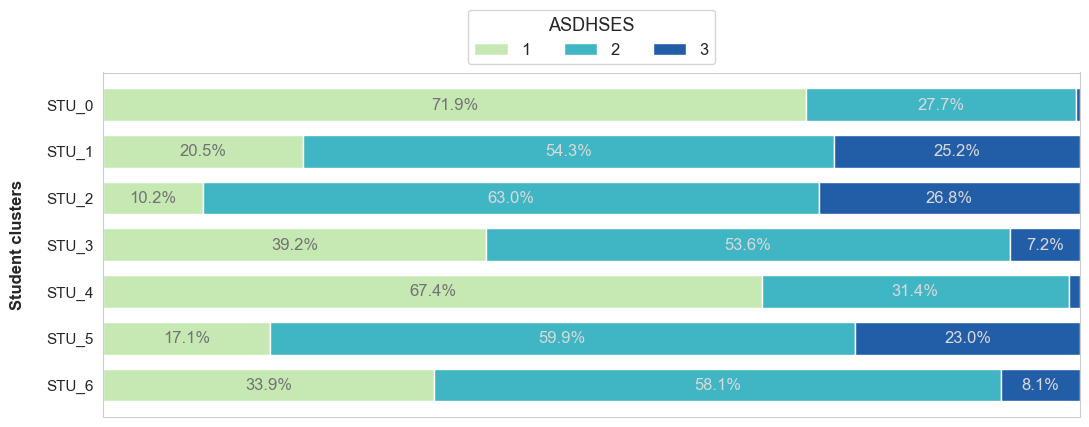

In [55]:
# 单一原始分类变量在各聚类中的分布
cl.plot_cat_distribution_by_cluster(df_original['ASDHSES'], cat_label='ASDHSES', cluster_label='Student clusters')
# output_path=os.path.join("img_MAC", "单一原始分类变量在各聚类中的分布clustering_cat_comparison.jpg"))
print("已完成单一原始分类变量在各聚类中的分布的生成。")

In [56]:
# ITSEX	Sex of Students	学生性别  1: Girl; 2: Boy
cl.describe_clusters_cat(df_original['ITSEX'], cat_name='ITSEX', normalize=True)

ITSEX         1      2
Clusters              
STU_0    0.5375 0.4625
STU_1    0.4409 0.5591
STU_2    0.5211 0.4789
STU_3    0.4785 0.5215
STU_4    0.4302 0.5698
STU_5    0.3929 0.6071
STU_6    0.5000 0.5000

内部变量：降维之后的变量dim

外部变量：原始变量

### 3.2. Cluster means vs global means comparison 聚类均值与全局均值的比较

#### 3.2.1. Internal variables 内部变量

In [57]:
# 比较聚类均值与全局均值的差异。
cl.compare_cluster_means_to_global_means()

cl.compare_cluster_means_to_global_means().to_csv('data_TWN/data_台湾_modified_比较聚类内均值与全局均值的差异——降维.csv', index=False)
print("已完成，比较聚类内均值与全局均值的差异——降维，结果保存。")

已完成，比较聚类内均值与全局均值的差异——降维，结果保存。


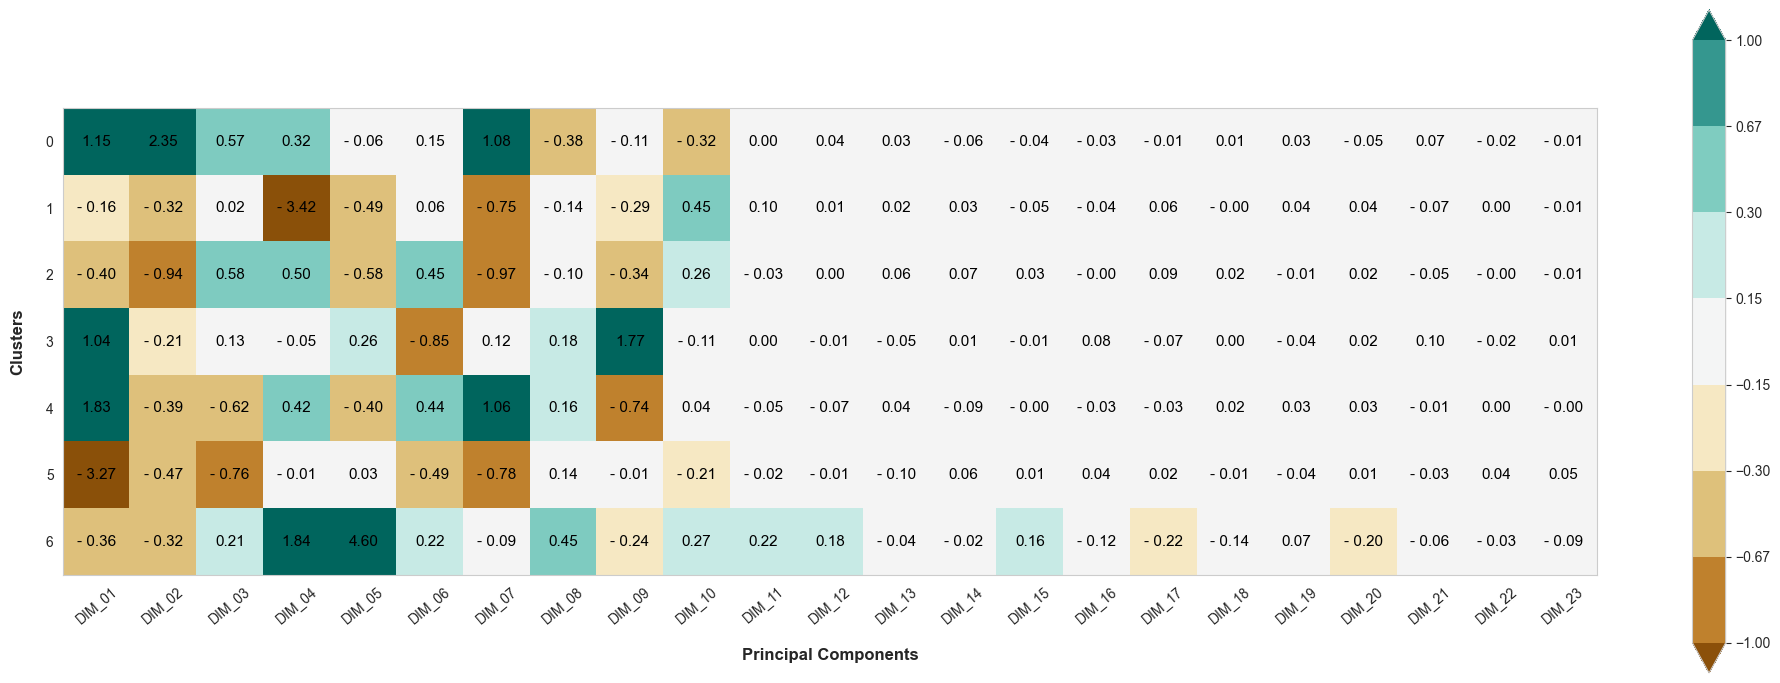

In [58]:
# 比较聚类均值与全局均值的差异，并可视化。
# Principal Components 主成分
# Clusters 聚类（簇）
cl.plot_cluster_means_to_global_means_comparison(xlabel='Principal Components', ylabel='Clusters', 
                                                 levels=[-1, -0.67, -0.3, -0.15, 0.15, 0.3, 0.67, 1])

#### 3.2.2. External variables 外部变量

Note that for external variables we normalize variables to the 0-1 scale in order to make fair comparisons.

注意，对于外部变量，我们将变量标准化到0-1范围内，以便进行公平的比较。


In [59]:
mms = MinMaxScaler()

In [60]:
# 对外部变量进行标准化后，比较聚类均值与全局均值。
cl.compare_cluster_means_to_global_means(pd.DataFrame(mms.fit_transform(df_original[num_vars_sel]), columns=num_vars_sel))
cl.compare_cluster_means_to_global_means().to_csv('data_TWN/data_台湾_modified_比较聚类内均值与全局均值的差异.csv', index=False)
print("已完成，比较聚类内均值与全局均值的差异，结果保存。")

已完成，比较聚类内均值与全局均值的差异，结果保存。


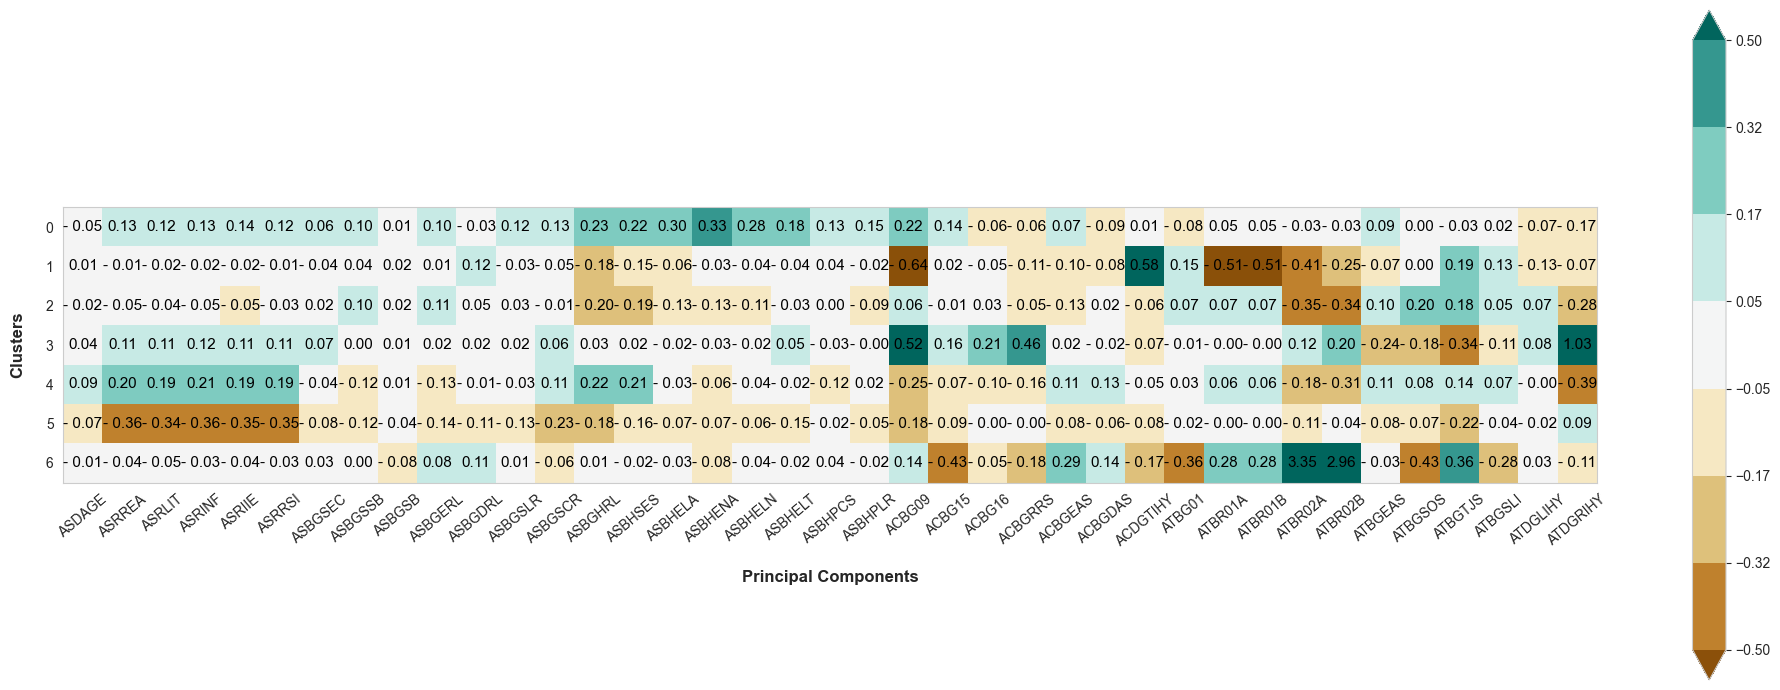

In [61]:
# Principal Components 主成分
# Clusters 聚类（簇）
# 对外部变量（筛选出来的数值变量）比较聚类均值与全局均值。
cl.plot_cluster_means_to_global_means_comparison(df_original=pd.DataFrame(mms.fit_transform(df_original[num_vars_sel]), columns=num_vars_sel), 
                                                 xlabel='Principal Components', ylabel='Clusters', use_weights=True)

### 3.3. Significance tests 显著性测试

In [62]:
# ANOVA tests for internal variables 内部变量的 ANOVA 测试
# 对内部变量进行 ANOVA 测试，分析聚类之间的显著性差异。
cl.anova_tests(cluster_filter=[1, 2], vars_test=['dim_01', 'dim_05', 'dim_08'])

var_name     df  sum_sq  mean_sq      F  PR(>F)
0   dim_01 1.0000  4.9681   4.9681 2.6202  0.1063
1   dim_05 1.0000  0.6141   0.6141 0.6844  0.4086
2   dim_08 1.0000  0.1740   0.1740 0.1187  0.7306

In [63]:
cl.anova_tests(cluster_filter=[1, 2], vars_test=['dim_02', 'dim_03'])

var_name     df  sum_sq  mean_sq       F  PR(>F)
0   dim_02 1.0000 34.7642  34.7642 17.0615  0.0000
1   dim_03 1.0000 27.3355  27.3355 11.9438  0.0006

In [64]:
# ANOVA tests for External variables
# ANOVA测试（方差分析）用于外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解

cl.anova_tests(cluster_filter=[1, 2], df_test=df_original[['ATBR10G', 'ATBR09D']])

var_name     df  sum_sq  mean_sq       F  PR(>F)
0  ATBR10G 1.0000 23.8831  23.8831 40.8848  0.0000
1  ATBR09D 1.0000  0.0004   0.0004  0.0006  0.9807

In [65]:
# 分类变量
# 性别
cl.chi2_test(df_original['ITSEX'])

{'chi2': np.float64(15.97304311413436),
 'p': np.float64(0.013899389836394568),
 'dof': 6}

In [66]:
# 分类变量
# 阅读基准
cl.chi2_test(df_original['ASRIBM'])

{'chi2': np.float64(1013.1672467810928),
 'p': np.float64(1.4224907644672332e-198),
 'dof': 24}

In [67]:
# ATDGEAS 学校强调学术成功-教师/指数
cl.chi2_test(df_original['ATDGEAS'])

{'chi2': np.float64(86.06544904307691),
 'p': np.float64(1.9855016597373427e-16),
 'dof': 6}

### 3.4. Distribution comparisons (visualizations) for numerical variables
数值变量的分布比较（可视化）


#### 3.4.1. Internal variables 内部变量

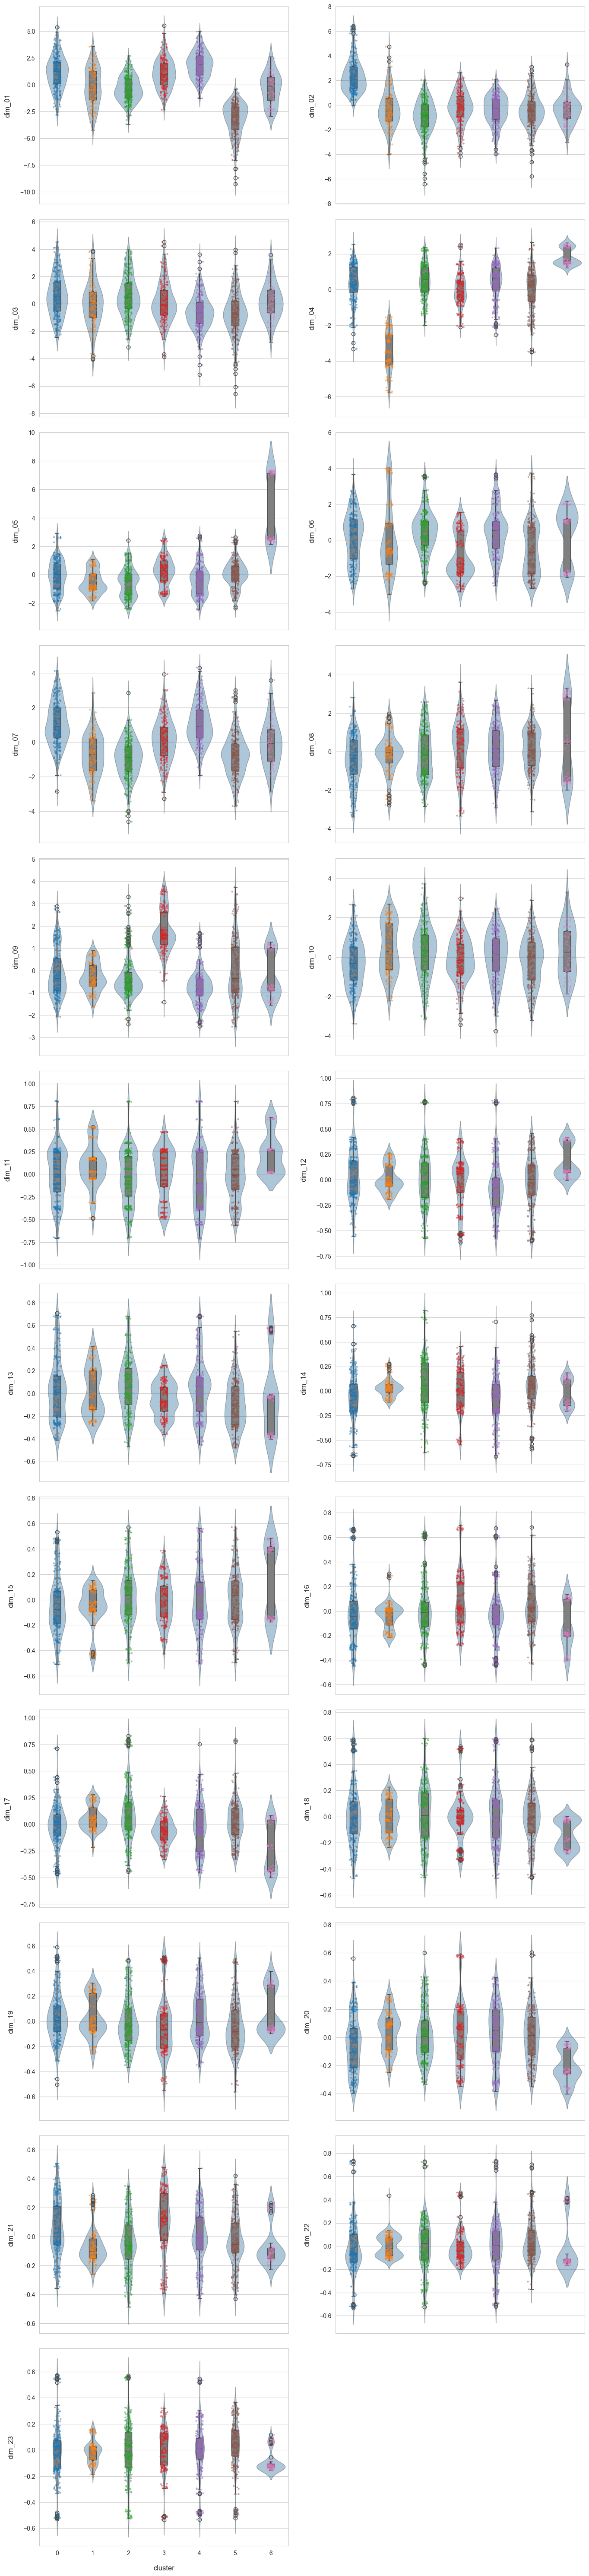

In [68]:
# Internal variables 内部变量 
# 比较降维后数值变量在各聚类中的分布的生成
cl.plot_distribution_comparison_by_cluster()

#### 3.4.2. External variables 外部变量

已完成部分比较原始数值变量在各聚类中的分布的生成。


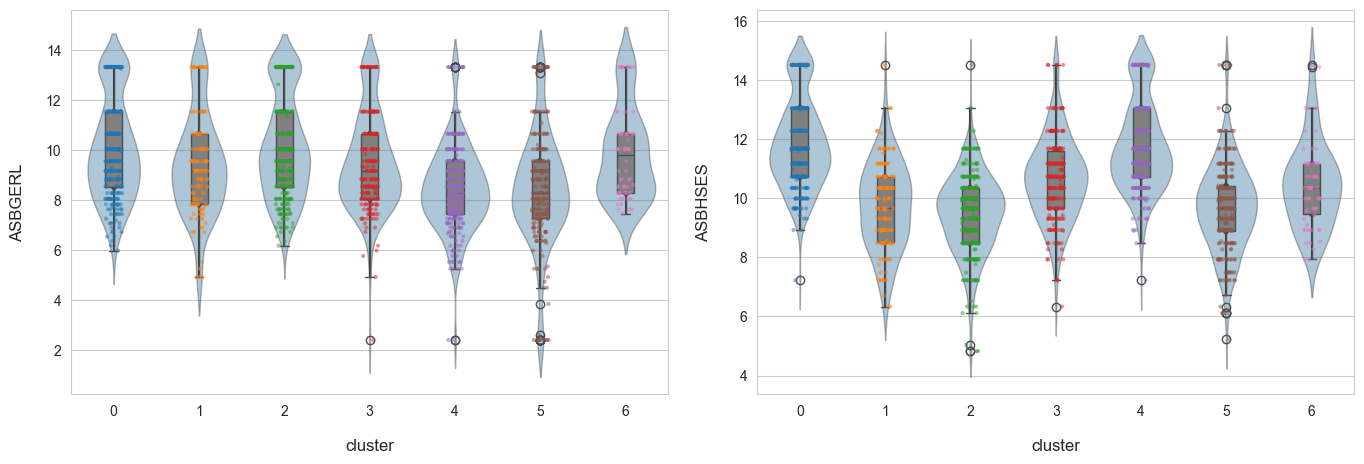

In [69]:
# External variables 外部变量
# ASBGERL	STUDENTS ENGAGED IN READING LESSONS/SCL	学生参与阅读课程/量表
# ASBHSES	HOME SOCIOECONOMIC STATUS/SCL	家庭社会经济地位/量表
# 比较部分原始数值变量在各聚类中的分布
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ASBGERL', 'ASBHSES']])
                                        #    output_path=os.path.join("img_MAC", "部分_比较原始数值变量在各聚类中的分布clustering_distribution_comparison.jpg"))
print("已完成部分比较原始数值变量在各聚类中的分布的生成。")
# cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10G', 'ATBR09D']])

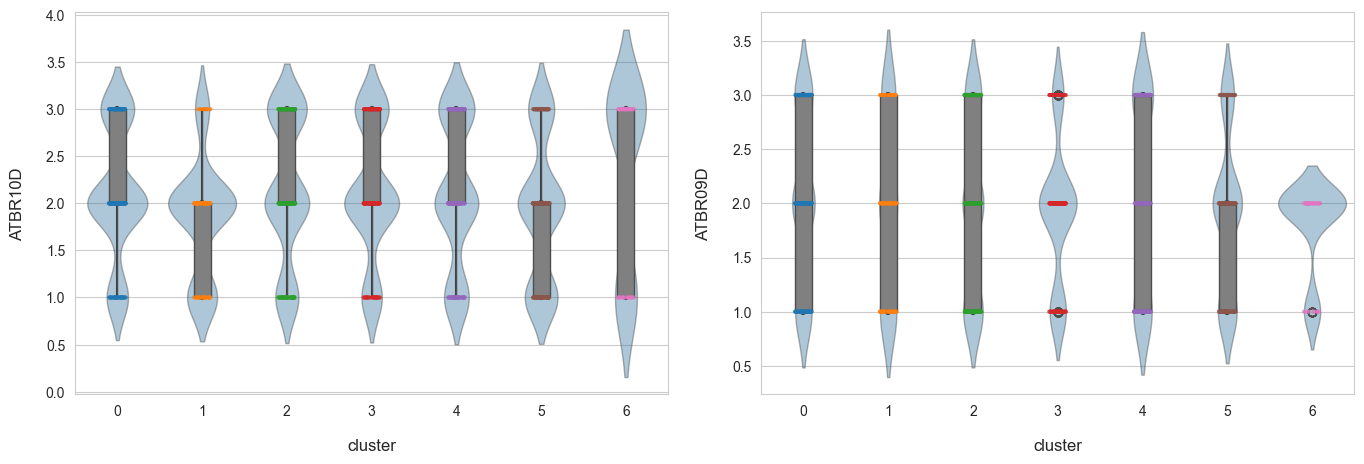

In [70]:
# External variables 外部变量
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10D', 'ATBR09D']])

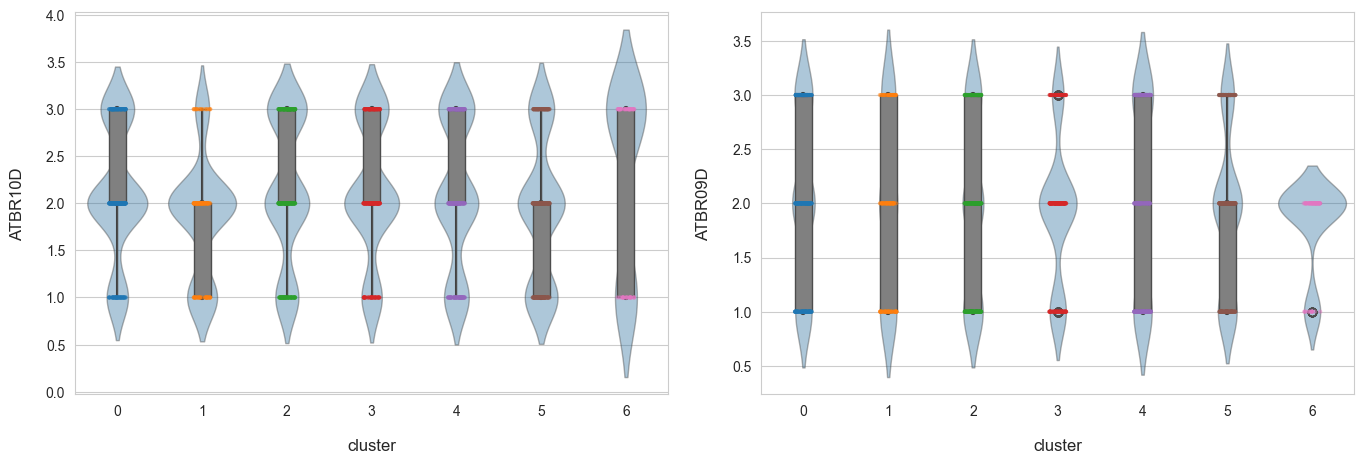

In [71]:
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10D', 'ATBR09D']]) #, output_path='PATH.jpg')

### 3.5. 2-Dimensional plots for numerical variables 2D 数值变量的可视化

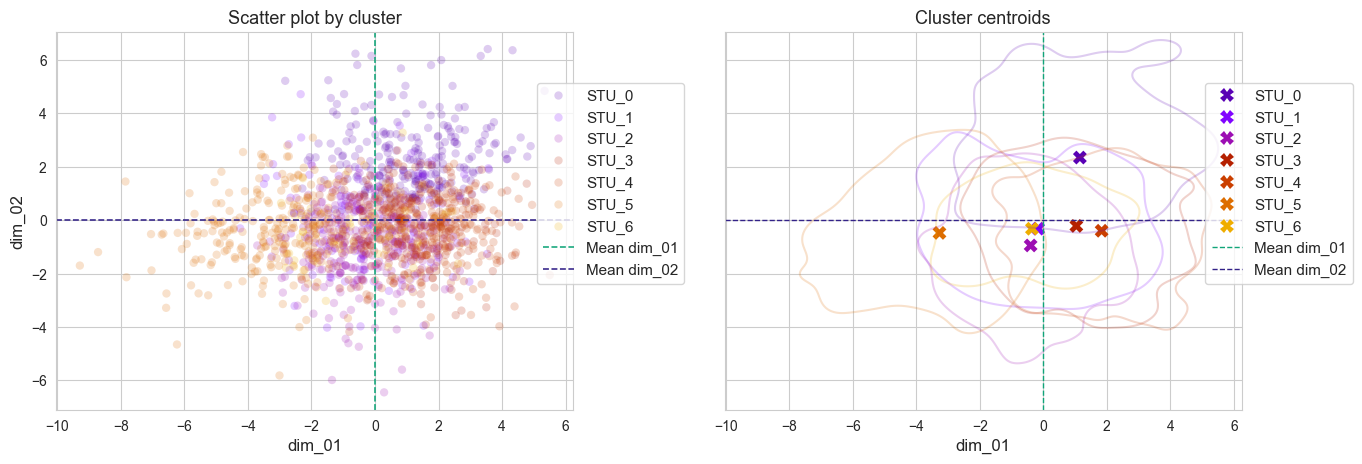

In [72]:
# Internal variables 内部变量
cl.plot_clusters_2D('dim_01', 'dim_02', style_kwargs=dict(kdeplot=True, alpha=0.2)) #, output_path='PATH.jpg')

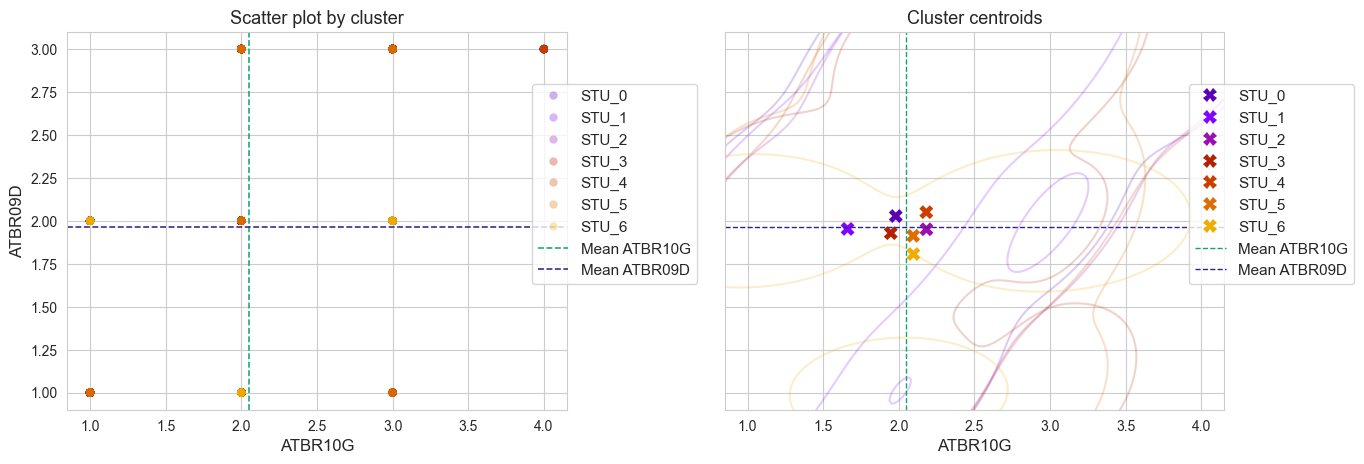

In [73]:
#External Variables 外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解
cl.plot_clusters_2D(df_original['ATBR10G'], df_original['ATBR09D'])

### 3.6. Distribution comparisons (visualization) for categorical variables 

分类变量的分布比较（可视化）

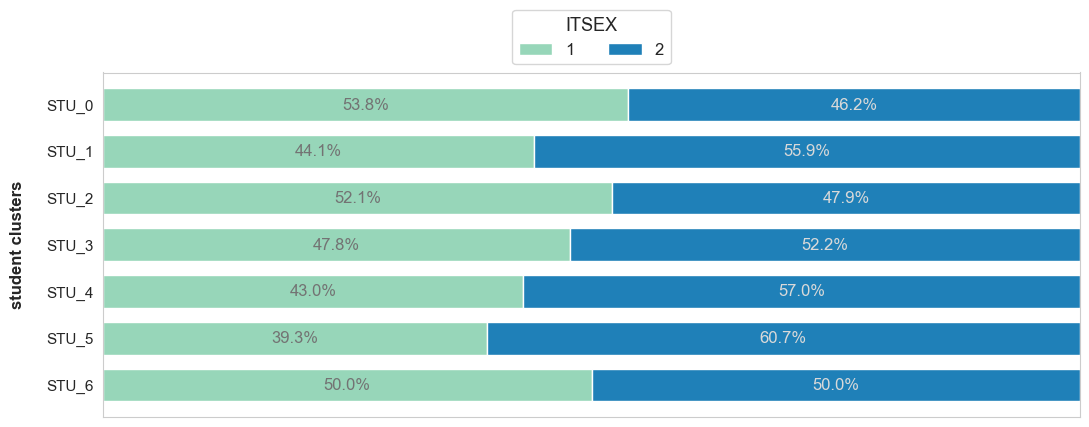

In [74]:
# 分类变量的分布可视化
cl.plot_cat_distribution_by_cluster(df_original['ITSEX'], cat_label='ITSEX', cluster_label='student clusters')

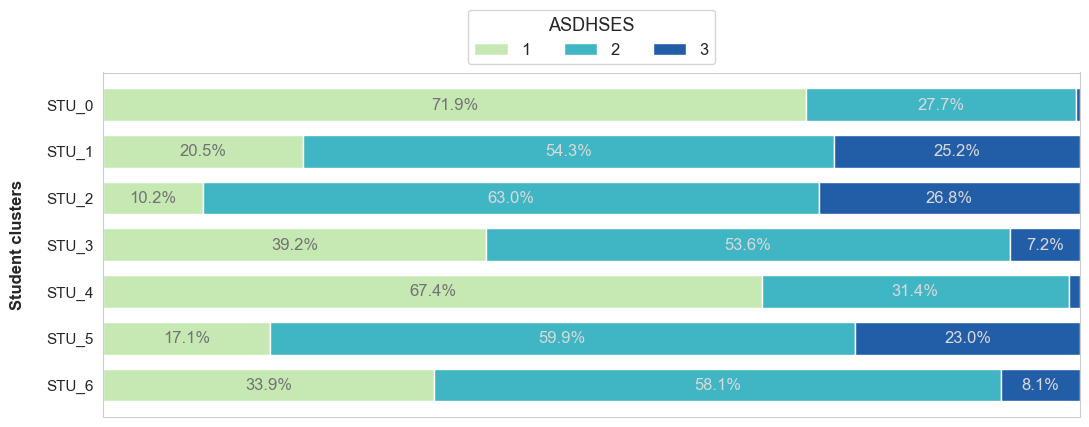

In [75]:
# ASDHSES	HOME SOCIOECONOMIC STATUS/IDX	家庭社会经济地位/指数
cl.plot_cat_distribution_by_cluster(df_original['ASDHSES'], cat_label='ASDHSES', cluster_label='Student clusters')

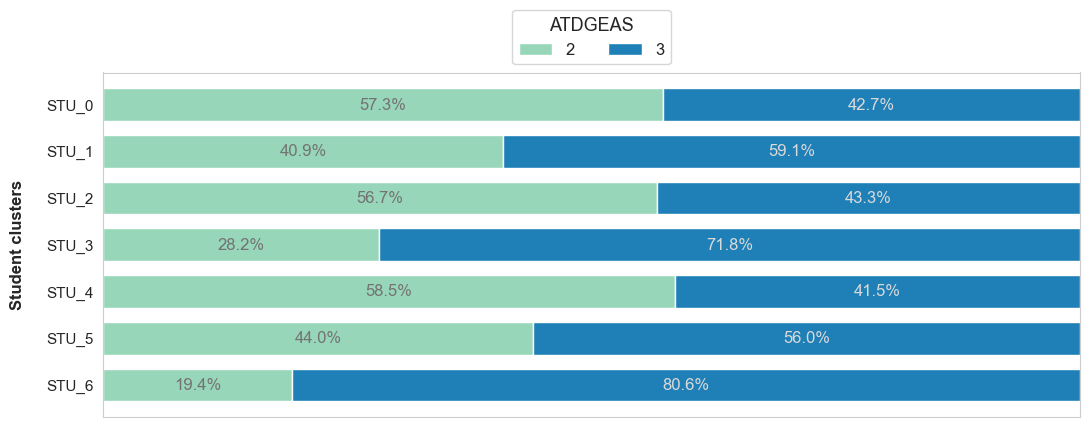

In [76]:
# ATDGEAS 学校强调学术成功-教师/指数
cl.plot_cat_distribution_by_cluster(df_original['ATDGEAS'], cat_label='ATDGEAS', cluster_label='Student clusters')

## Export results 导出结果

Export results: 导出结果
- One data set with the clusters associated to the extracted components;
- 一个数据集，其中包含与提取的成分相关的聚类。

- Another one with the clusters associated to the original data.
- 另一个数据集，其中包含与原始数据相关的聚类。


In [77]:
cl.df.to_csv('data_TWN/data_台湾_modified_preprocessed_dim_red_clustered_output.csv', index=False)

In [78]:
# 一次性添加两列
new_columns = pd.DataFrame({
    "cluster": cl.df["cluster"].values,
    "cluster_cat": cl.df["cluster_cat"].values
})
df_original = pd.concat([df_original, new_columns], axis=1)

# df_original['cluster'] = cl.df['cluster'].values
# df_original['cluster_cat'] = cl.df['cluster_cat'].values
df_original.to_csv('data_TWN/data_台湾_modified_preprocessed_clustered_output.csv', index=False)

## Reproducibility 可重复性

In [79]:
df_ref = pd.read_csv('data_TWN/data_台湾_modified_preprocessed_dim_red_clustered_output.csv')

print('Diff', (df_ref['cluster'] != cl.df['cluster']).sum())

Diff 0
